<a href="https://colab.research.google.com/github/aimancreator/phytonaiman/blob/main/02_0_Data_Exploration_and_Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright (c) 2019 Skymind AI Bhd.
# Copyright (c) 2020 CertifAI Sdn. Bhd.
#
# This program and the accompanying materials are made available under the
# terms of the Apache License, Version 2.0 which is available at
# https://www.apache.org/licenses/LICENSE-2.0.
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.
#
# SPDX-License-Identifier: Apache-2.0

# Explore Statistics by Data Visualization

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from scipy.stats import skewnorm
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
%matplotlib inline

We will use a small dataset that contains (Physics,Biology and Maths) marks of a classroom of students.

Read the comma-seperated file(csv) that contains the marks. We assign the "Names" column as our index

In [65]:
df = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv",index_col=0)

Show the first 5 rows of data.

In [5]:
df.head()

,Physics,Biology,Maths
Name,,,
Arnold,80,78,70
Bob,60,98,45
Cassandra,34,56,65
Donovan,56,65,32
Emily,98,23,55


Show all the data entries.

In [6]:
df

,Physics,Biology,Maths
Name,,,
Arnold,80,78,70
Bob,60,98,45
Cassandra,34,56,65
Donovan,56,65,32
Emily,98,23,55
Fabian,45,44,60
Grom,12,66,80
Hilary,60,88,78
Ivan,45,97,99


Show the first 5 rows of ```biology``` data column.

In [7]:
df["Biology"].head()

Name
Arnold       78
Bob          98
Cassandra    56
Donovan      65
Emily        23
Name: Biology, dtype: int64

Describe the dataset.
- count: Total number of valid data. Will ignore null
- mean: Mean value of data
- std: Standard deviation of data
- min: Minimum value of data
- 25%, 50%, 75%: Percentiles of data. This can be specifed from the parameters by passing ```percentiles``` as list format. Default value is [.25, .5, .75]

In [60]:
df.describe()

,0
count,10000.000000
mean,0.782793
std,0.618056
min,-0.659709
25%,0.318837
50%,0.679267
75%,1.146886
max,3.835518


Show the information about you data frame, e.g. Columns, Data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Arnold to Zayn
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Physics  26 non-null     int64
 1   Biology  26 non-null     int64
 2   Maths    26 non-null     int64
dtypes: int64(3)
memory usage: 832.0+ bytes


Show available columns of data.

In [12]:
df.columns.values

array(['Physics', 'Biology', 'Maths'], dtype=object)

Plot a **bar chart** of the grades data.

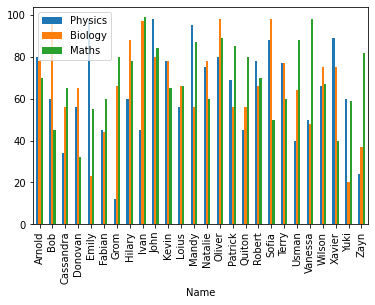

In [66]:
df.plot(kind="bar")

Plot a **box plot** of the grades data.

### Boxplot parameters
<img src="https://matplotlib.org/3.2.2/_images/boxplot_explanation.png" width="500"/>

[Image Source: Matplotlib](https://matplotlib.org/3.2.2/faq/howto_faq.html)

### Understanding boxplot
- Boxplot is a method to display the distribution of data
- The Interquartile Range(IQR) indicates the range where most data is spread. We can use this to observe the spread of data. In other words, the data is concentrated in the IRQ. 
- Simple interpretation:
    - For Biology, we can understand that most student score in between 59 to 79. 
    - Also, someone score below the expected minimum. Note that the expected minimum is only a boxplot indicator. It is not the minimum score from the data. The expected minimum value is calculated using the formula above. From this, we can understand that someone underachieved the test. This is called lower outlier. If someone score over the expected maximum, it is called higher outlier.

Show boxplot

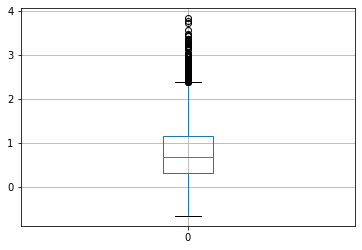

In [61]:
df.boxplot()

### Histogram parameters
- x-axis: observed value
- y-axis: frequency of occurences

### Understanding histogram
- Histogram can be used to evaluate frequency of value.

Plot the **histograms** of the grades data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f963f7f3b50>]],
      dtype=object)

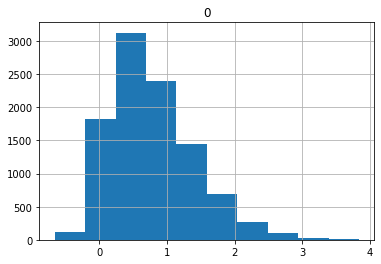

In [63]:
df.hist()

Plot only the histogram of "Physics" column.

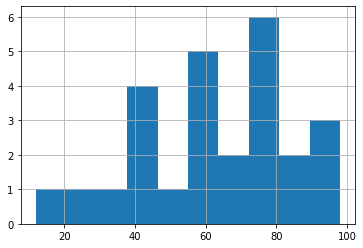

In [67]:
df["Physics"].hist()

We can plot a distribution plot by using **seaborn** module.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


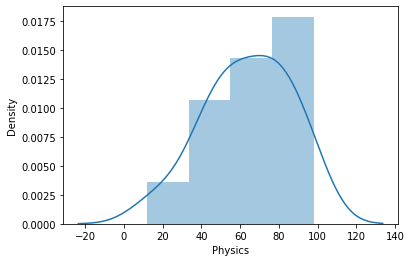

In [18]:
sns.distplot(df["Physics"])

We can check how "normally distributed" a distribution is by checking the skewness of the distribution.
- A skewness value of 0 indicates a symmetrical distribution of values.
- A negative skewness value indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution(Left skewed).
- A positive skewness value indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution(Right skewed)

Check the skewness of all columns or only 1 column.

In [59]:
df.skew()

0    0.847522
dtype: float64

In [58]:
df["Physics"].skew()


KeyError: ignored

# Data Transformation 1 - Skewness

In many Machine Learning modeling scenarios, **normality** of the features in a dataset is desirable. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a **Gaussian distribution** as possible in order to stabilize variance and **minimize skewness**.

In [55]:
transformer = PowerTransformer(method='box-cox', standardize=False)

In [69]:
df["Physics"].shape


Name
Arnold       80
Bob          60
Cassandra    34
Donovan      56
Emily        98
Name: Physics, dtype: int64

Currently, the data looks like this:
```example_data = [1, 2, 3, 4, 5, 6]```
The example_data has 6 elements arranged as single 1d array (also known as vector). 

In [28]:
# View df["Physics"] in list

print(df["Physics"].tolist())

[80, 60, 34, 56, 98, 45, 12, 60, 45, 98, 78, 56, 95, 75, 80, 69, 45, 78, 88, 77, 40, 50, 66, 89, 60, 24]


The Transformer accepts 2d array, which is not compatible to our 1D data. We will first transform the shape of data with reshape().

In [29]:
data_2d = df["Physics"].values.reshape(-1,1)
data_2d.shape

(26, 1)

Every data in the 1D array is transformed into their own list of size (1, 1) and combined together with other data to produce (26, 1).

In [30]:
# View transformed data in list

print(data_2d.tolist())

[[80], [60], [34], [56], [98], [45], [12], [60], [45], [98], [78], [56], [95], [75], [80], [69], [45], [78], [88], [77], [40], [50], [66], [89], [60], [24]]


Transform the data and check the values.

In [31]:
data_trans = transformer.fit_transform(data_2d)

In [36]:
df_new = pd.DataFrame(data_trans,index=df.index)
df_new.head()

,0
Name,
Arnold,182.021329
Bob,127.269458
Cassandra,62.621506
Donovan,116.790676
Emily,234.202382


Rename the column to ```Physics``` according to the original. This is not a required step. But, if you have more than one column, renaming is a good practice

In [39]:
df_new.rename(columns={0: "Physics"}, inplace=True)
df_new.head()

,Physics
Name,
Arnold,182.021329
Bob,127.269458
Cassandra,62.621506
Donovan,116.790676
Emily,234.202382


Plot the histogram of the transformed "Physics" marks and visualize the distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f963fc41610>]],
      dtype=object)

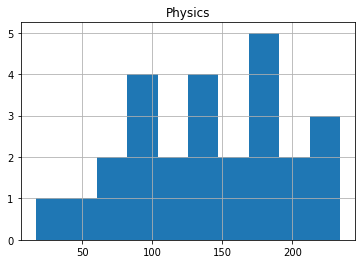

In [35]:
df_new.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


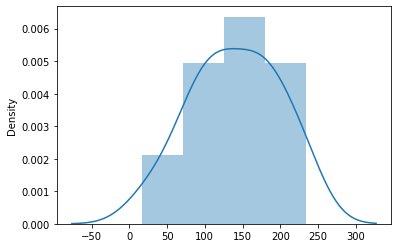

In [40]:
splot = sns.distplot(df_new)

The plotted distribution graph looks a like a **normal distribution**, but due to the dataset, the transformation is not very obvious.

We will compare the **skewness** to assert that the data transformation has made the distribution more "normally distributed".

In [70]:
print("Skewness before: {}".format(df["Physics"].skew()))
print("Skewness after: {}".format(df_new.skew().squeeze())) # squeeze() convert 1D object to scalar

Skewness before: -0.3898546715641385
Skewness after: -0.027530890151643162


Now, let us try with our own generated distribution. We will generate a distribution that is **greatly skewed**.

In [71]:
# skewnorm will generate random numbers

rand_vars = skewnorm.rvs(5, size=10000)

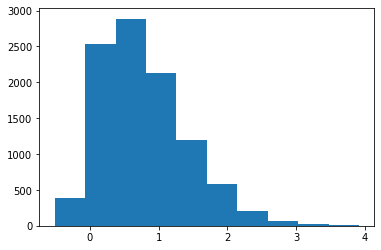

In [72]:
fig, ax = plt.subplots(1, 1)
ax.hist(rand_vars)
plt.show()

In [44]:
df = pd.DataFrame(rand_vars)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


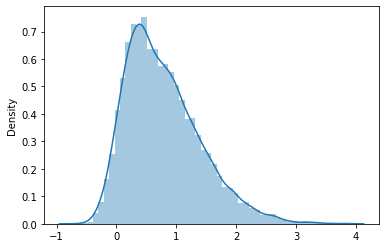

In [45]:
sns.distplot(df)

As you can see, we have 10000 random variables are the distribution is non-normal distribution and greatly skewed.

Let us check the skewness of our generated data.

In [46]:
df.skew().squeeze()

0.8475223115271493

Our dataset is positive skewed. This round, we will use **Log Transform** to transform our data and observe the results.

In [47]:
transformer = FunctionTransformer(np.log1p, validate=True)

In [48]:
data_trans = transformer.transform(df)

In [49]:
df_new = pd.DataFrame(data_trans)

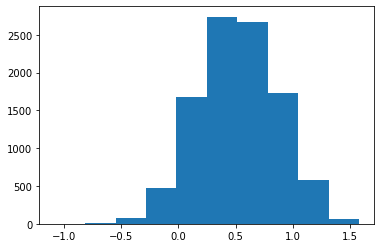

In [73]:
fig, ax = plt.subplots(1, 1)
ax.hist(data_trans)
plt.show()

In [51]:
print("Skewness before: {}".format(df.skew().squeeze()))
print("Skewness after: {}".format(df_new.skew().squeeze()))

Skewness before: 0.8475223115271493
Skewness after: -0.027530890151643162


As you can the skewness is greatly reduced and the distribution resembles a **normal distribution**.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


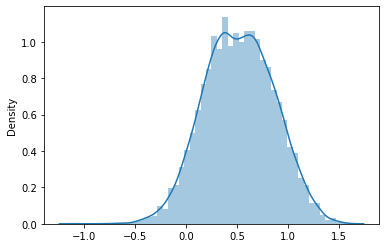

In [52]:
sns.distplot(df_new)

# Data Transformation 2 - One-hot encoding

Another frequent encounter of data is the value are not in number. The example below shows a string dataset. Sklearn algorithm cannot process string data. So, the data need to be represented as numbers. One method is to perform one-hot encoding.

In [74]:
x = ["Jack", "Jill", "Mary", "Jack", "Jill", "Jill"]
df = pd.DataFrame(x, columns=["Name"])

get_dummies will create new columns according to all variables in the specified column.

In [75]:
df_one_hot = pd.get_dummies(df)

In [76]:
df_one_hot

,Name_Jack,Name_Jill,Name_Mary
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0


As seen above, all variables are converted to columns and the column that is associated to it is marked as 1

# Data Transformation 3 - Ordinal Variables

This technique transform the data by assigning labels according to a ranges or data group. An ordinal variable is similar to categorical variable except there is a sense of order to the labelled data.

For example, in clothing, rather than dealing with continuous chest size, shirt length, etc. for measurement, consumer use labels such as small, medium, large, etc. to define the size. The order is from small to large.

The example below shows an application for households income range in Malaysia. The defined labels are based on 2019 income thresholds. [Source](https://ringgitplus.com/en/blog/personal-finance-news/dosm-survey-higher-income-thresholds-for-b40-m40-t20-households-in-2019.html#:~:text=According%20to%20the%20report%2C%20the,960%20and%20above%20for%20T20.)

In [77]:
# Generate 10 random numbers range 1000 to 20000 indicating households income
min_limit = 1000
max_limit = 20000
a = np.random.randint(low=min_limit, high=max_limit, size=10) 
df = pd.DataFrame(a, columns=["data"])
df

,data
0,6410
1,2279
2,19780
3,17321
4,8145
5,12914
6,9847
7,11848
8,1576
9,1879


In [78]:
bins = [min_limit, 4850, 10959, max_limit]
labels = ["B40", "M40", "T20"]

df["encoded"] = pd.cut(df["data"], bins=bins, labels=labels, include_lowest=True)
df

,data,encoded
0,6410,M40
1,2279,B40
2,19780,T20
3,17321,T20
4,8145,M40
5,12914,T20
6,9847,M40
7,11848,T20
8,1576,B40
9,1879,B40


Now all the data are encoded according to the range of bins. Then you can one-hot encode them.

In [79]:
df_one_hot = pd.get_dummies(df["encoded"])
df = pd.concat([df["data"], df_one_hot], axis=1)
df

,data,B40,M40,T20
0,6410,0,1,0
1,2279,1,0,0
2,19780,0,0,1
3,17321,0,0,1
4,8145,0,1,0
5,12914,0,0,1
6,9847,0,1,0
7,11848,0,0,1
8,1576,1,0,0
9,1879,1,0,0


Now the dataframe are transformed into their respective labels

# Data Transformation 4 - Handle Missing data
In the real-world dataset, there will be missing data which most of the time, represented as NaN.

Not all missing data can be handled. One example is string data such as address or product name. There is no way to approximate the data by itself. 

Adding artificial data may or may not work well as it will introduce noise, especially if the missing data is the label. Thus, one handling method is to remove the row. Handle missing data is more of experimentation to see which works the best.

In this example, we are going to look at the sklearn function called SimpleImputer.

Consider the data below.

In [89]:
# Generate random data with NaN
a = np.random.randn(6)
idx = np.random.randint(len(a)) 
a[2] = np.nan
a[4] = np.nan
a[idx] = np.nan

In [90]:
df = pd.DataFrame(a, columns=["My Data"])
df

,My Data
0,1.637476
1,1.662902
2,NaN
3,1.010315
4,NaN
5,NaN


In [96]:
imp = SimpleImputer(strategy="most_frequent")
df_fixed = imp.fit_transform(df)

In [92]:
df_fixed

array([[1.63747602],
       [1.6629019 ],
       [1.43689754],
       [1.01031471],
       [1.43689754],
       [1.43689754]])

### String data

In [84]:
a = ["jack", "jill", "john", "ali", np.nan, "jack"]
df = pd.DataFrame(a, columns=["name"])

In [86]:
imp = SimpleImputer(strategy="constant", fill_value="abu")
df_fixed = imp.fit_transform(df)
df_fixed

array([['jack'],
       ['jill'],
       ['john'],
       ['ali'],
       ['abu'],
       ['jack']], dtype=object)

SimpleImputer provides four strategies to impute missing data
- mean: replace with mean along each column
- median: replace with median along each column
- most_frequent: replace with the most frequent value along each column
- constant: replace with a specified fill_value. Can be used for strings

It is important to understand that handling missing data is just an approximation. As you can see with SimpleImputer, the strategies are based on statistical technique(except constant), which, depends on overall column values. Imputing value using "noisy" data will add more noise to the data.